<a href="https://colab.research.google.com/github/Taha0229/Nobel-Prize-Analysis-/blob/main/Nobel_Prize_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

###Outcomes of this Analysis are-

Nobel Prize Analysis:
In this data science project, I tried to analyse a dataset on the past winners of the Nobel Prize to see what patterns we can uncover in the past Nobel laureates and what we can learn about the Nobel Prize and our world more generally.
The project had the following objectives:
1. Percentage of Male vs. Female Laureates
2. Repeated winners
3. Number of prizes per category
4. Male and Female Winners by Category
5. Are more prizes awarded recently than when the prize was first created?
6. Are more prizes shared than before?
7. The countries with the most Nobel Prizes
8. In which categories are the different countries winning prizes?
9. Number of prizes won by each country over time, and when did the USA go ahead of other countries?
10. What are the top research organisations?
and many more.


The data was visualised using multiple charts, like **donut pie charts**, **bar charts**, **scatter plots** along with **line charts**, **horizontal bar charts**, **chloropleth maps**, **sunburst charts**, **histograms**, and **box plots.**
Languages and Tools: **Python: Numpy, Pandas, Matplotlib, Plotly, Seaborn, Google Colab.**

In [4]:
# %pip install --upgrade plotly

### Import Statements

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [7]:
data = pd.read_csv('nobel_prize_data.csv')

# Data Exploration & Cleaning

**Tasks**: Preliminary data exploration.
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [8]:
data.shape

(962, 16)

In [9]:
data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [10]:
data.year.min()

1901

In [11]:
data.year.max()

2020

**Tasks**:
* Check for duplicate values in the dataset.
* Check for NaN values in the dataset.
* Reasons of NaN values

### Check for Duplicates

In [12]:
data.duplicated().values.any()

False

In [13]:
data.isna().values.any()
data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [14]:
data.birth_date = pd.to_datetime(data.birth_date)



#### Add a Column with the Prize Share as a Percentage

In [15]:
ps = data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(ps[0])
denomenator = pd.to_numeric(ps[1])
psp = numerator/denomenator * 100
data['share_pct'] = psp
data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,33.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,25.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,25.00


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Task**: Create a donut chart using plotly which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [16]:

data_grp = data.groupby('sex').count()
data_grp
fig = px.pie(data_grp, values='year', names=data_grp.index, hole=0.5)
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Task**:
* Names of the first 3 female Nobel laureates?
* What did they win the prize for?
* Analyze `birth_country`? Were they part of an organisation?

In [17]:
data.sort_values(['sex', 'year'])[:3]


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


# Find the Repeat Winners


In [18]:
more = data.full_name.duplicated().values
data[more]
data.query('full_name == "Marie Curie, née Sklodowska" ')
data[more]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,100.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,100.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,33.33
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR,25.00
523,1981,Peace,The Nobel Peace Prize 1981,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00


# Number of Prizes per Category

**Tasks**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [19]:
data.groupby('category').count()
# data.category.nunique()
prizes_per_category = data.category.value_counts()
prizes_per_category

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [20]:
bar = px.bar(prizes_per_category,
              x=prizes_per_category.index,
              y=prizes_per_category.values,
             title="Number of Prizes per Category",
             labels={'x':'Categories', 'y':'Number of Prizes'},
             color = prizes_per_category.values,
             color_continuous_scale='Aggrnyl')
bar.update_layout(coloraxis_showscale = False,
                  xaxis_title= 'Categories')
bar.show()

**Task**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [21]:
data.query('category == "Economics" ').sort_values('year')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,50.00
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,100.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,100.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Abhijit Banerjee,1961-02-21,Mumbai,India,India,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,IND,33.33
940,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Esther Duflo,1972-10-25,Paris,France,France,Female,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,FRA,33.33
941,2019,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for their experimental approach to alleviatin...,1/3,Individual,Michael Kremer,1964-11-12,"New York, NY",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA,33.33
952,2020,Economics,The Sveriges Riksbank Prize in Economic Scienc...,“for improvements to auction theory and invent...,1/2,Individual,Paul R. Milgrom,1948-04-20,"Detroit, MI",United States of America,United States of America,Male,Stanford University,"Stanford, CA",United States of America,USA,50.00


# Male and Female Winners by Category

* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?



In [22]:
cat = data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
cat = cat.sort_values('sex', ascending=False)

In [23]:
bar2 = px.bar(
    cat,
    x='category',
    y='prize',
    color='sex'
)
bar2.update_layout(yaxis_title = 'Number of Prizes',
                  xaxis_title = 'Categories')
bar2.show()

# Number of Prizes Awarded Over Time

**Task**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes.
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020.


**Analyze**
* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [24]:
by_year = data.groupby('year').count()
by_year
roll = by_year.rolling(window=5).mean()
roll[:10]
by_year

,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
year,,,,,,,,,,,,,,,,
1901,6,6,4,6,6,6,6,6,6,6,6,3,3,3,6,6
1902,7,7,5,7,7,7,7,7,7,7,7,4,4,4,7,7
1903,7,7,6,7,7,7,7,7,7,7,7,4,4,4,7,7
1904,6,6,5,6,6,6,5,5,5,5,5,3,3,3,5,6
1905,5,5,4,5,5,5,5,5,5,5,5,3,3,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,11,11,11,11,11,11,11,11,11,11,11,9,9,9,11,11
2017,12,12,12,12,12,12,11,11,11,11,11,10,7,7,11,12
2018,13,13,13,13,13,13,13,13,13,13,13,10,10,10,13,13


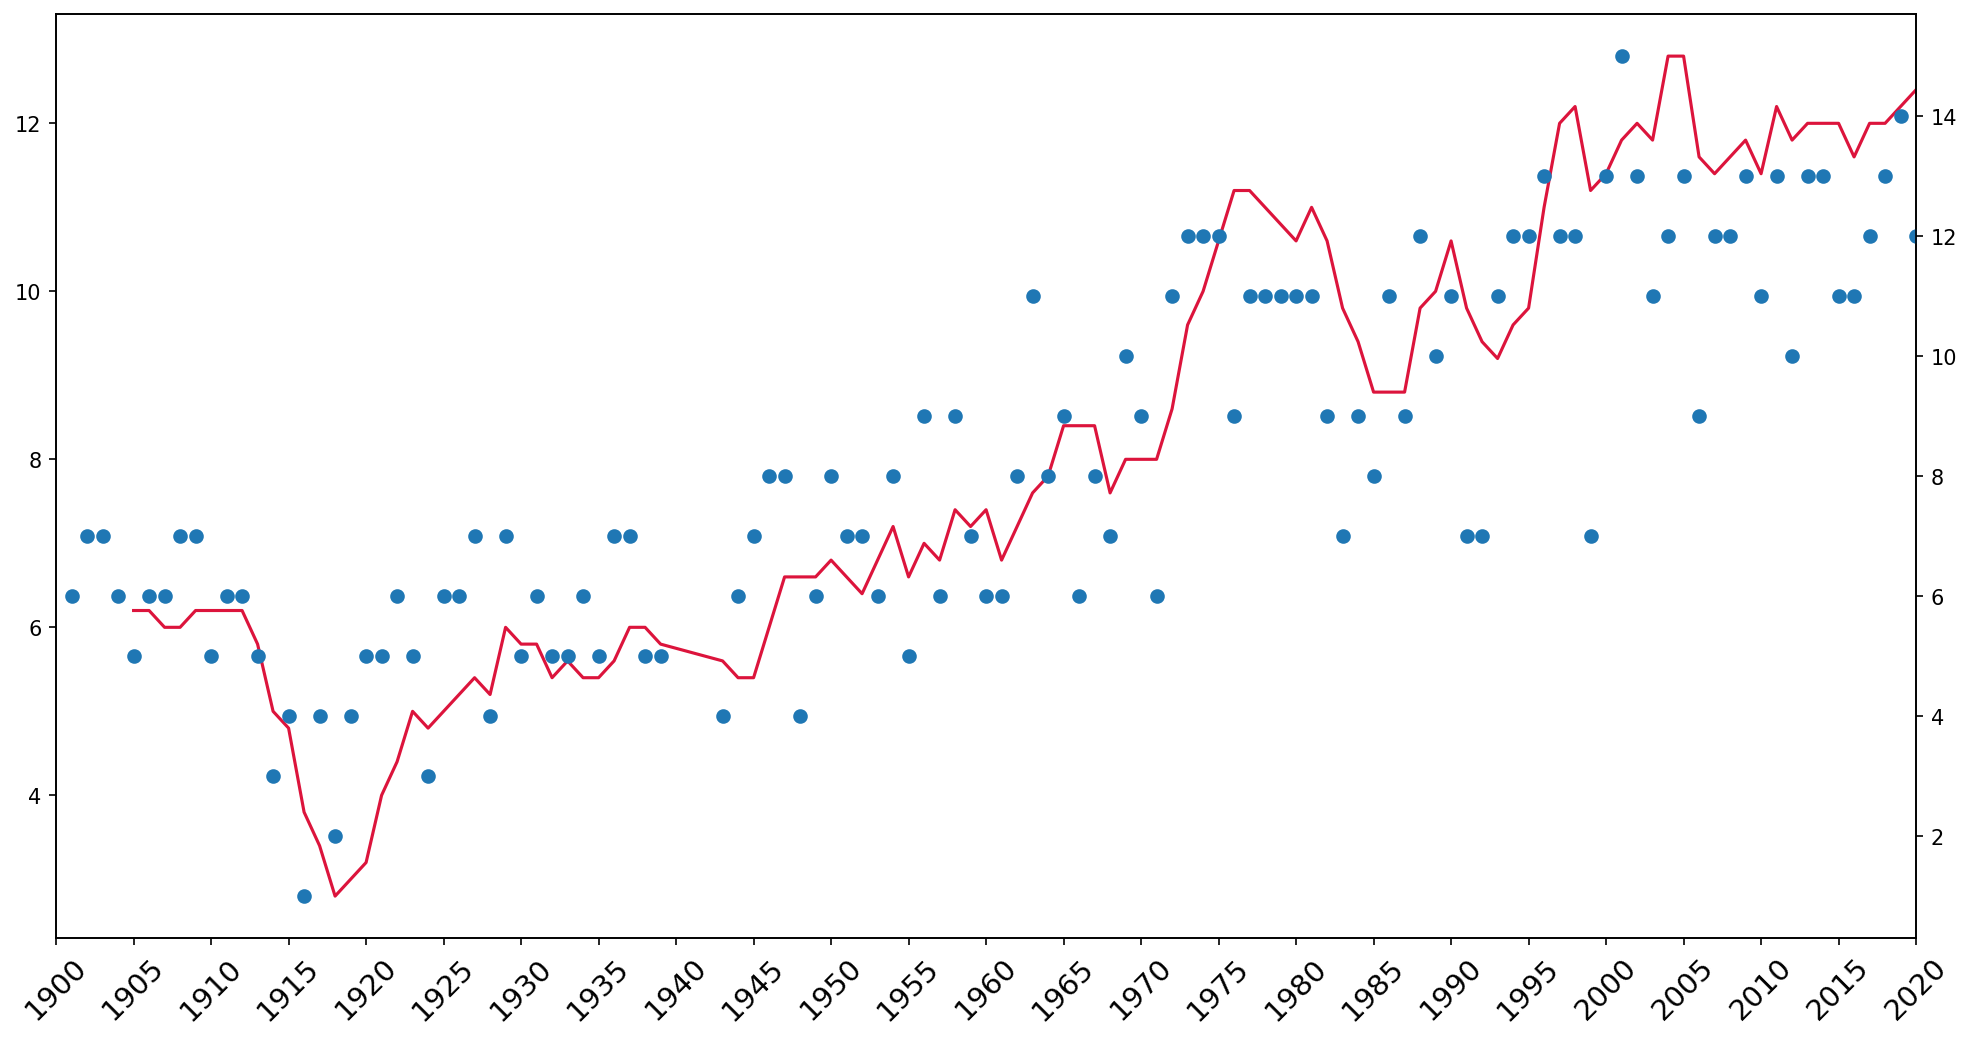

In [25]:
plt.figure(figsize = (16,8), dpi=150)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax1.set_xlim(1900, 2020)
ax2 = ax1.twinx()


ax1.plot(roll.index, roll.prize, c='crimson')
ax2.scatter(roll.index, by_year.prize)

plt.show()

# Are More Prizes Shared Than Before?

**Tasks**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Modify the code to add a secondary axis to the Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* can invert the secondary y-axis to make the relationship even more clear.

In [26]:
data.share_pct

0     100.00
1     100.00
2     100.00
3      50.00
4      50.00
       ...  
957    33.33
958   100.00
959    25.00
960    25.00
961    50.00
Name: share_pct, Length: 962, dtype: float64

In [27]:
filt1 = data.query('share_pct < 100 ')
filt1.sort_values('year')['share_pct'].mean()

41.14754098360656

In [28]:
yearly_avg_share = data.groupby(by='year').agg({'share_pct': pd.Series.mean})
roll_share = yearly_avg_share.rolling(window=5).mean()
roll_share


,share_pct
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,81.90
...,...
2016,52.28
2017,50.28
2018,50.28


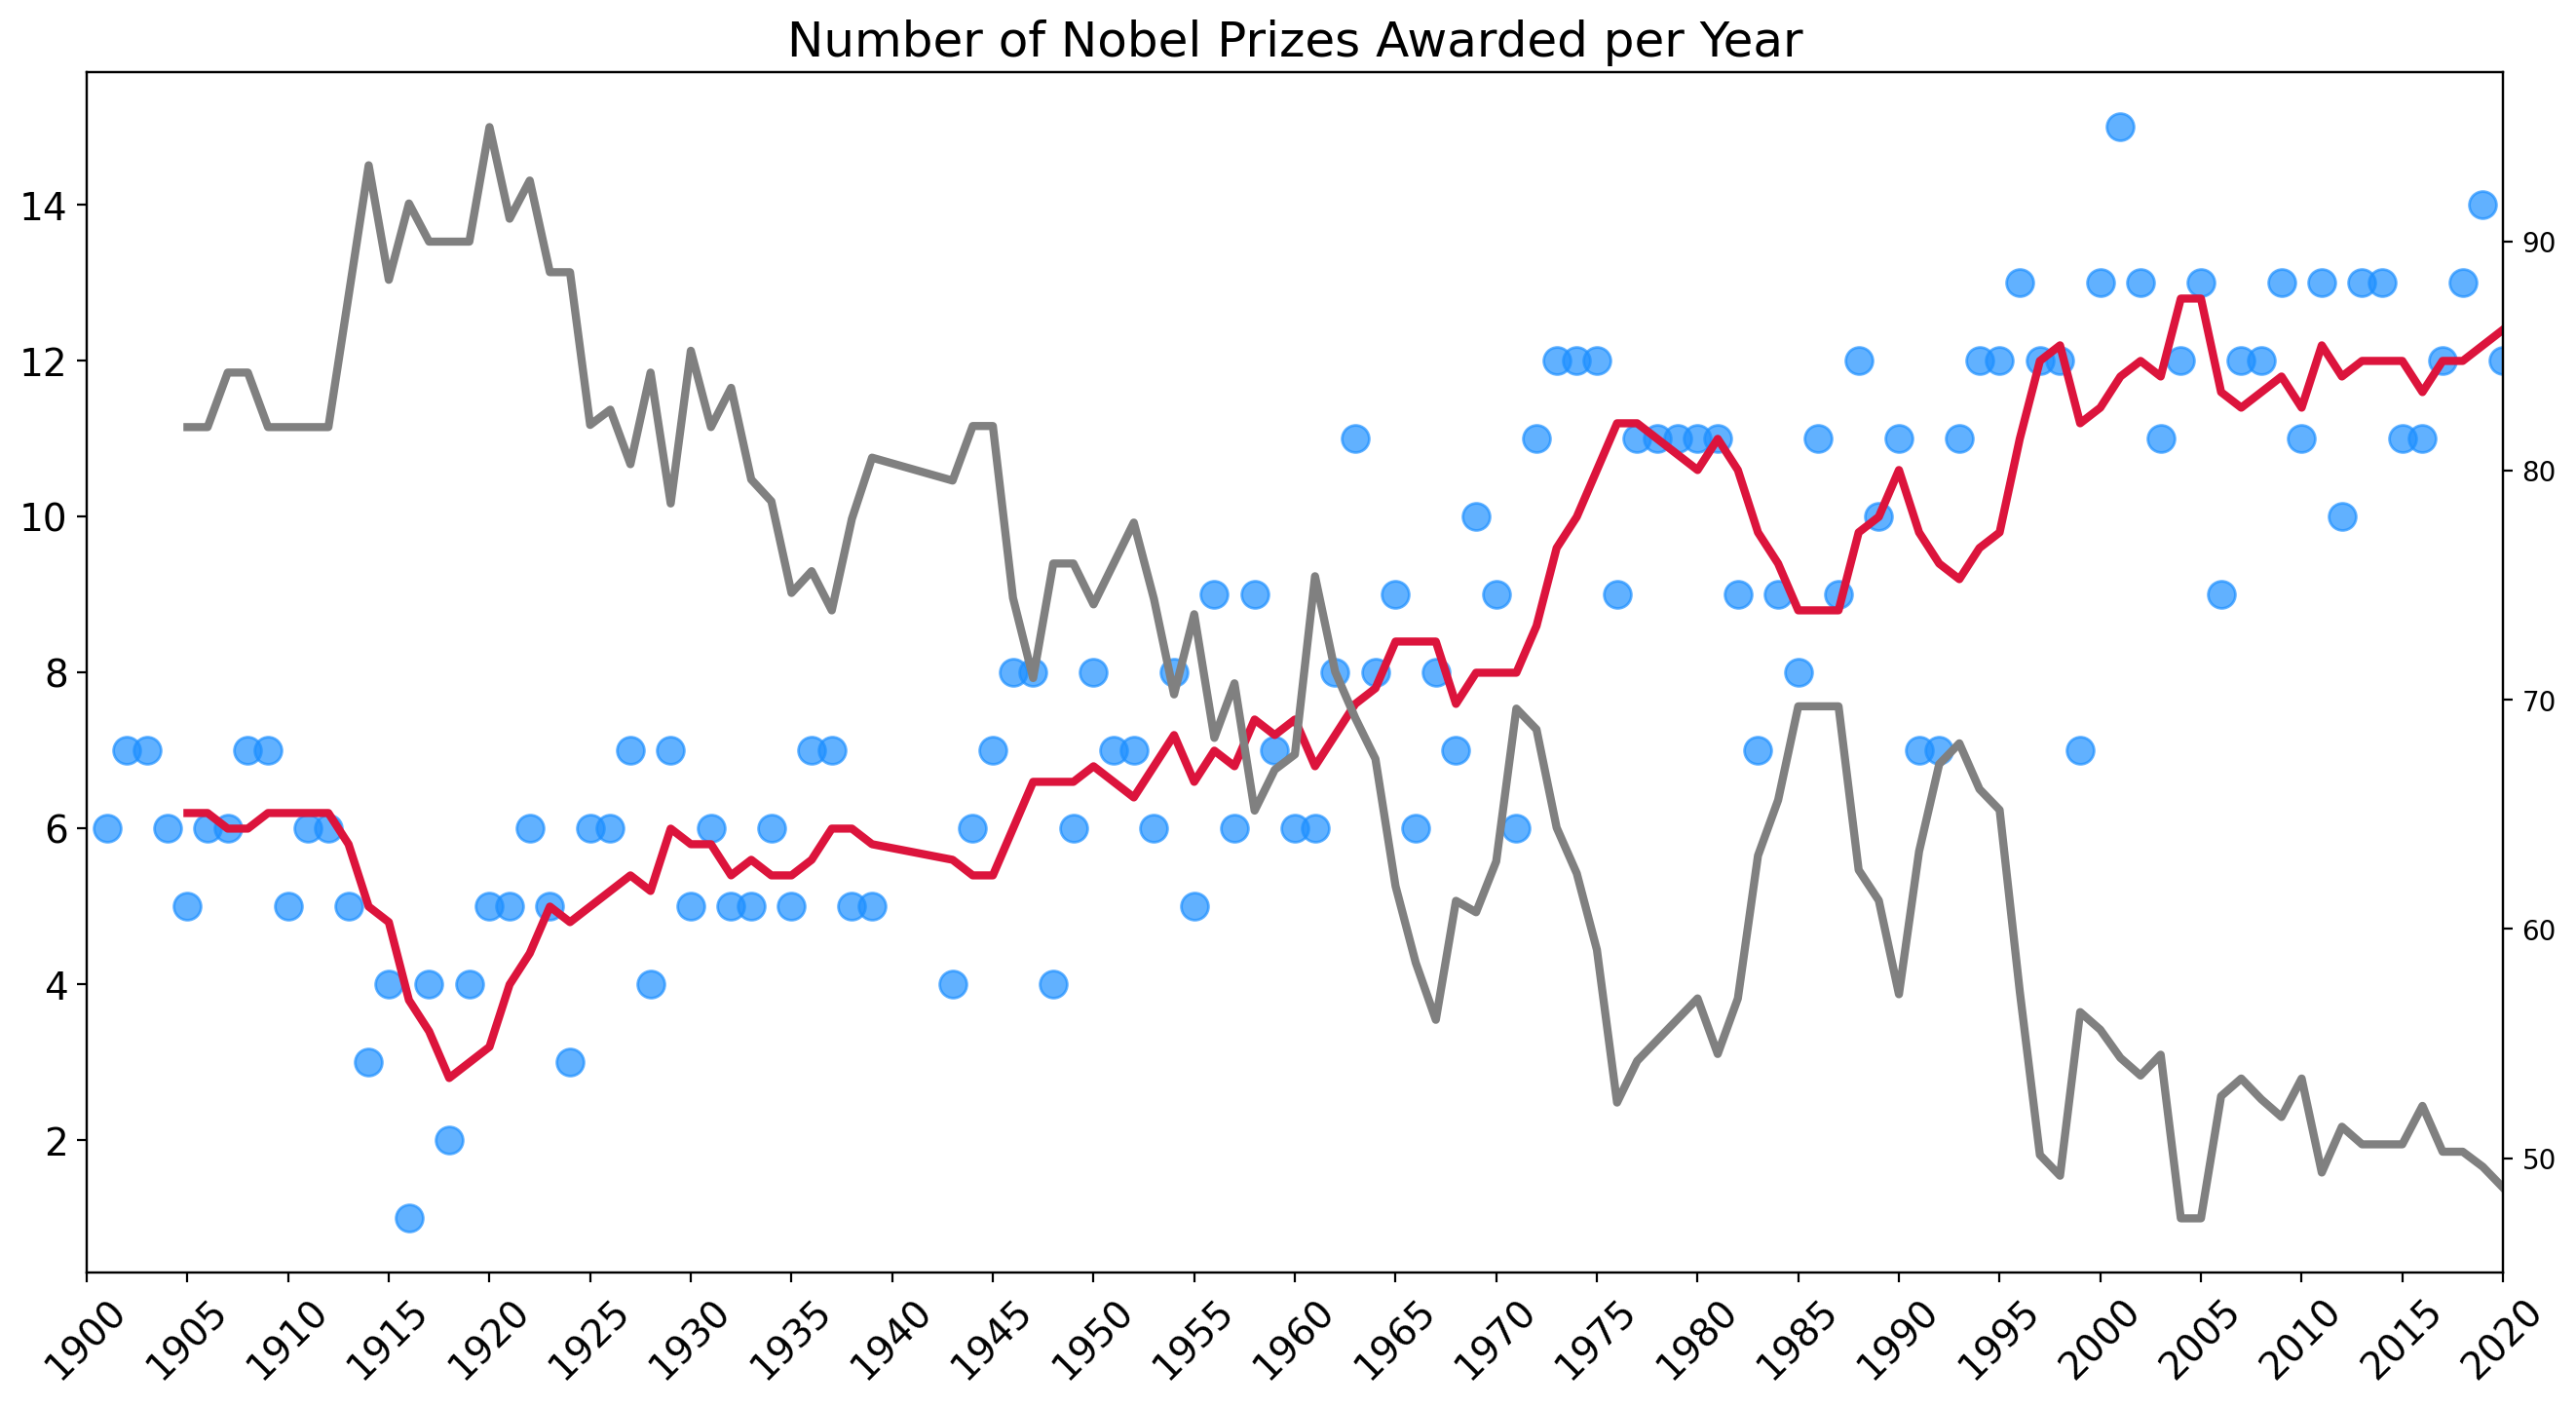

In [29]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)


ax1.scatter(x=roll.index,
           y=by_year.prize,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(roll.index,
        roll.prize,
        c='crimson',
        linewidth=3,)

# Adding prize share plot on second axis
ax2.plot(roll.index,
        roll_share.values,
        c='grey',
        linewidth=3,)

plt.show()

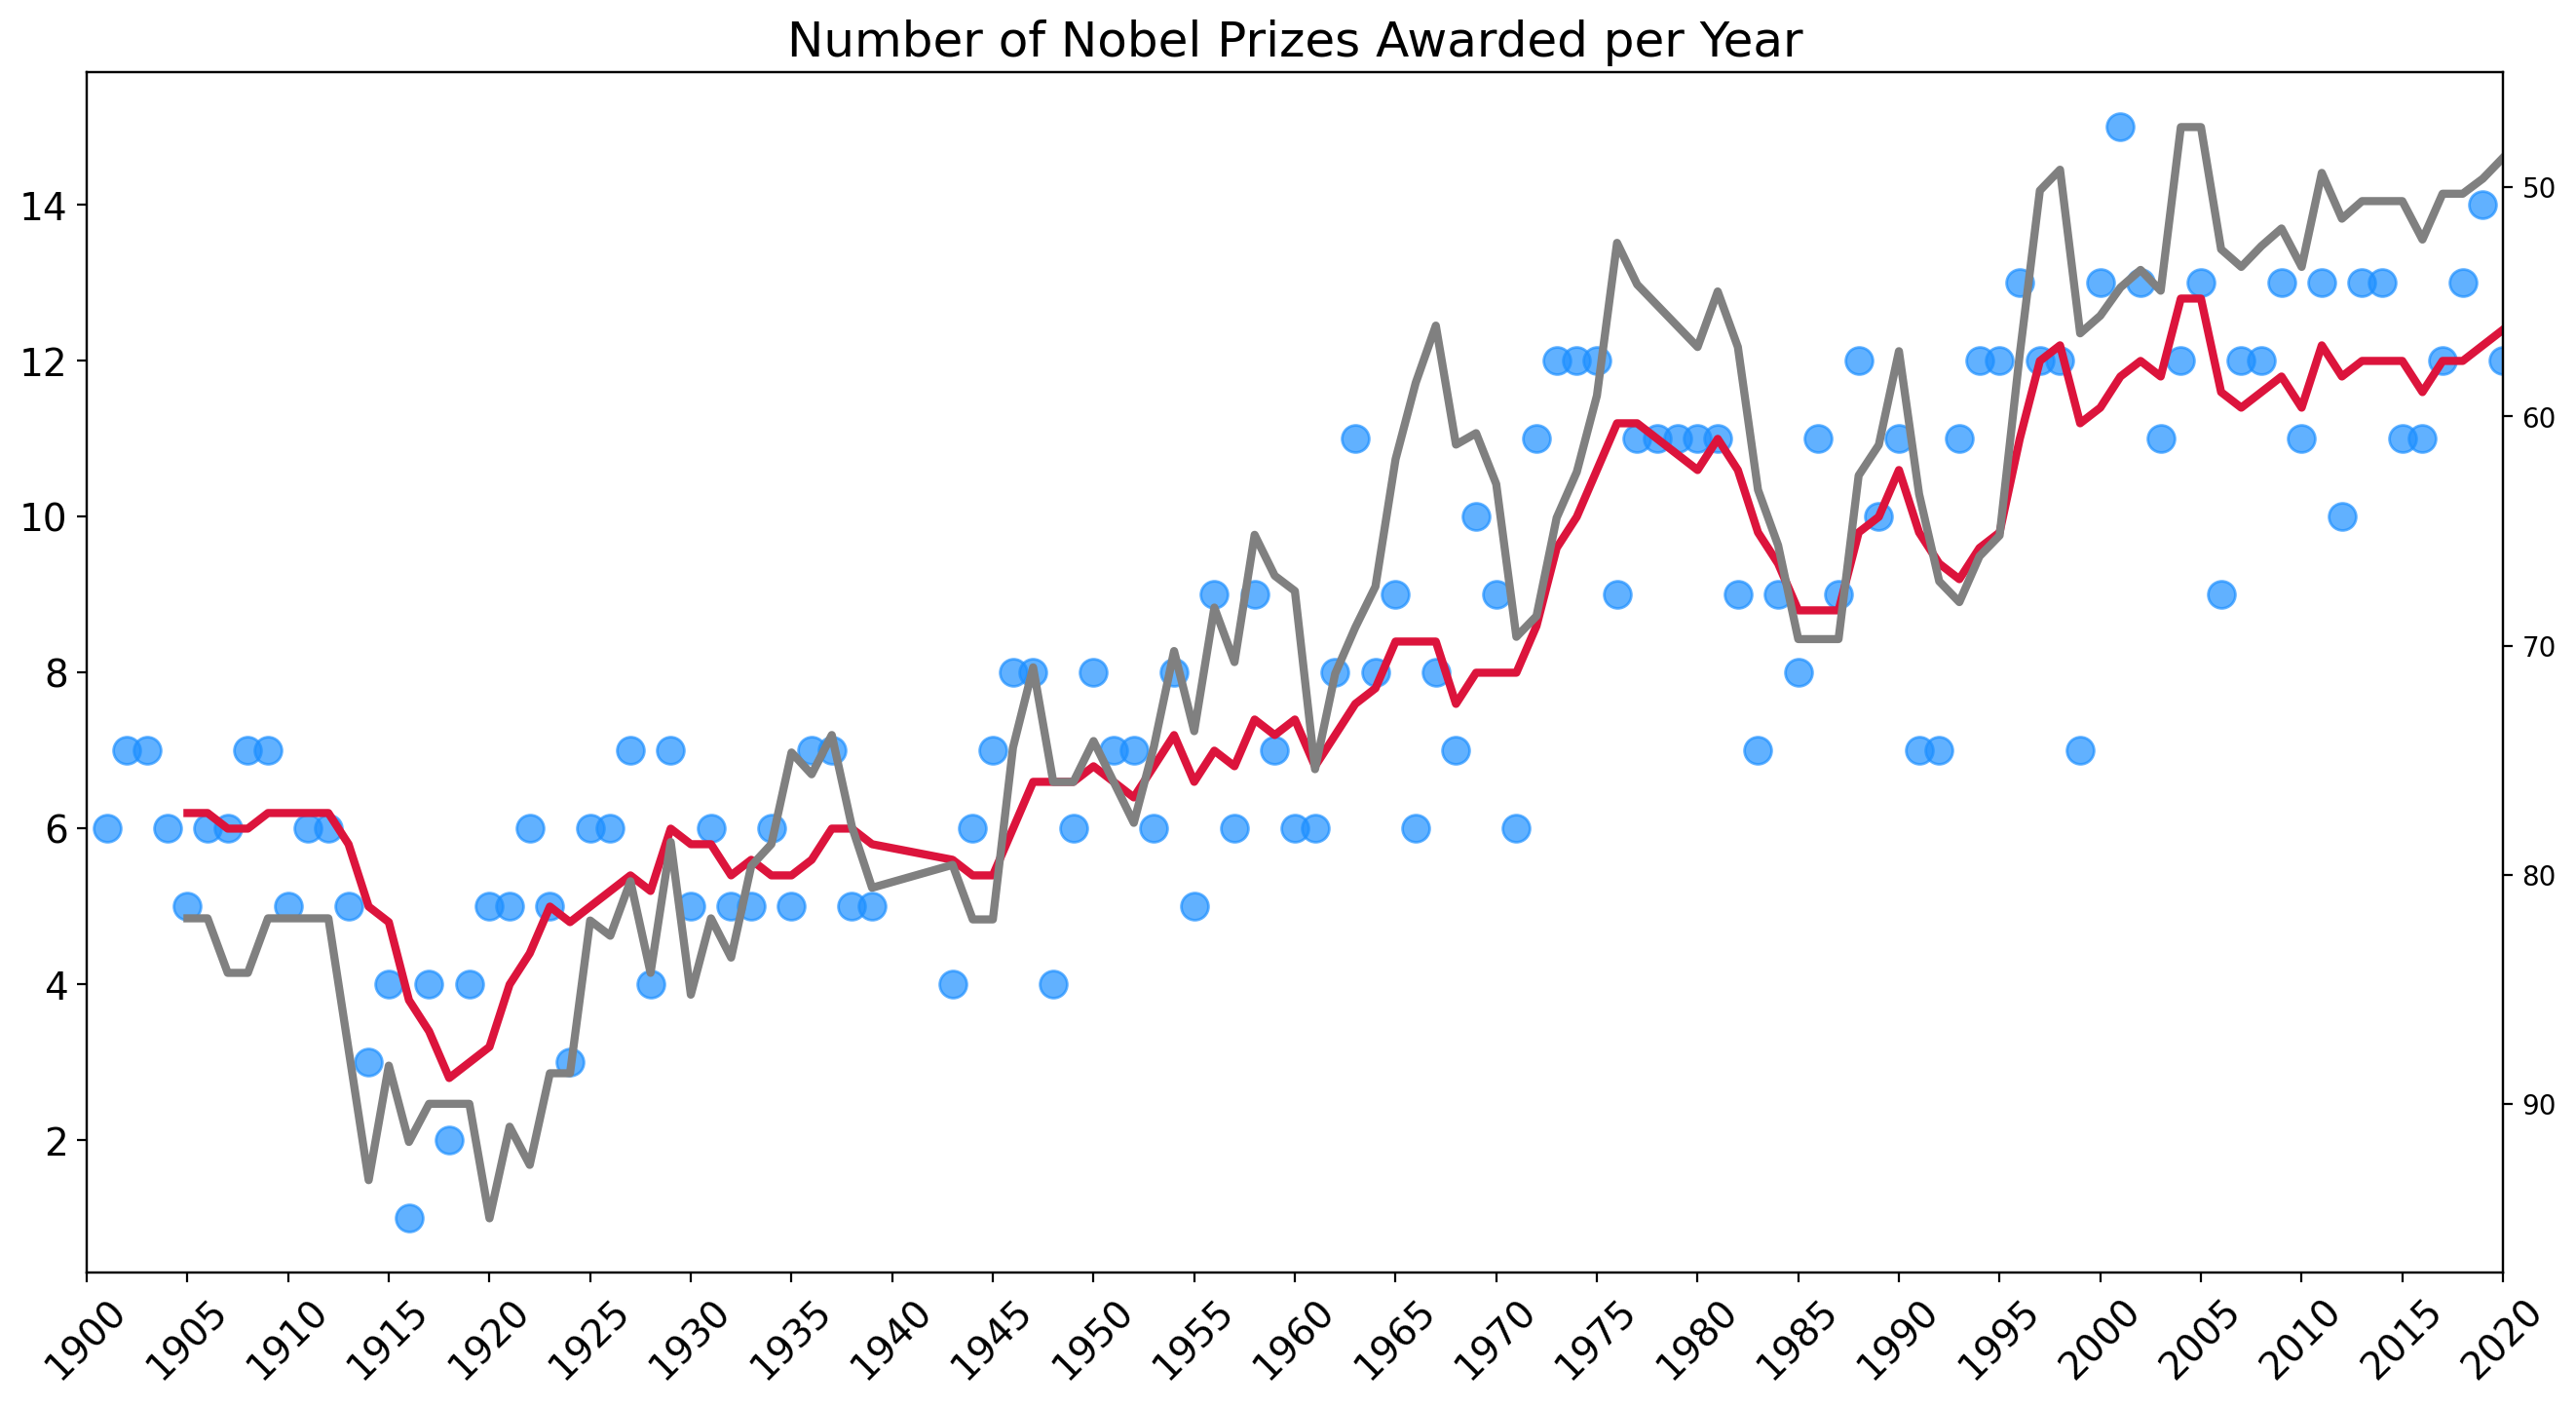

In [30]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
ax2.invert_yaxis()

ax1.scatter(x=roll.index,
           y=by_year.prize,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(roll.index,
        roll.prize,
        c='crimson',
        linewidth=3,)

# Adding prize share plot on second axis
ax2.plot(roll.index,
        roll_share.values,
        c='grey',
        linewidth=3,)

plt.show()

# The Countries with the Most Nobel Prizes

In [31]:
top20_countries = data[['birth_country_current','prize']]
top20_countries


,birth_country_current,prize
0,Netherlands,The Nobel Prize in Chemistry 1901
1,France,The Nobel Prize in Literature 1901
2,Poland,The Nobel Prize in Physiology or Medicine 1901
3,France,The Nobel Peace Prize 1901
4,Switzerland,The Nobel Peace Prize 1901
...,...,...
957,United Kingdom,The Nobel Prize in Physiology or Medicine 2020
958,NaN,The Nobel Peace Prize 2020
959,United States of America,The Nobel Prize in Physics 2020
960,Germany,The Nobel Prize in Physics 2020


In [32]:
top20_countries = top20_countries.groupby('birth_country_current').agg({'prize':pd.Series.count})
top20_c = top20_countries.sort_values('prize', ascending=False)[:20]
top20_c

,prize
birth_country_current,
United States of America,281
United Kingdom,105
Germany,84
France,57
Sweden,29
Japan,27
Poland,27
Russia,26
Canada,20


In [33]:
tt_c = top20_c.sort_values('prize')
tt_c

,prize
birth_country_current,
South Africa,9
Belgium,9
India,9
Australia,10
Norway,12
China,12
Denmark,12
Netherlands,18
Austria,18


In [34]:
h_bar = px.bar(
    tt_c,
    x='prize',
    y=tt_c.index,
    color = 'prize'
)
h_bar.update_layout(
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'Country',
    coloraxis_showscale=False

)
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country



In [35]:
grp_data = data.groupby(['ISO', 'birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
grp_data

,ISO,birth_country_current,prize
0,ARG,Argentina,4
1,AUS,Australia,10
2,AUT,Austria,18
3,AZE,Azerbaijan,1
4,BEL,Belgium,9
...,...,...,...
74,VEN,Venezuela,1
75,VNM,Vietnam,1
76,YEM,Yemen,1
77,ZAF,South Africa,9


In [36]:
fig = px.choropleth(grp_data, locations="ISO",
                    color="prize",
                    hover_name="birth_country_current",
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

In [37]:
data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,33.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,25.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,25.00


# In Which Categories are the Different Countries Winning Prizes?

**Tasks**:
* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?



In [38]:
data
g_d = data.groupby(['category', 'birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
g_d.sort_values('birth_country_current')
price_sum = g_d.groupby('birth_country_current').agg({'prize': pd.Series.sum})
g_d

merge_df = pd.merge(g_d, price_sum, on='birth_country_current')
merge_df.rename(columns={'prize_x':'cat_prize', 'prize_y':'total_prize'}, inplace=True)
merge_df.sort_values('cat_prize', ascending=False, inplace=True)
merge_df


,category,birth_country_current,cat_prize,total_prize
152,Medicine,United States of America,78,281
154,Physics,United States of America,70,281
149,Chemistry,United States of America,55,281
150,Economics,United States of America,49,281
146,Medicine,United Kingdom,28,105
...,...,...,...,...
81,Peace,Japan,1,27
76,Peace,Italy,1,19
73,Economics,Italy,1,19
72,Chemistry,Italy,1,19


In [39]:
h_bar = px.bar(
    merge_df[:40],
    x='cat_prize',
    y='birth_country_current',
    color = 'category'
)
h_bar.update_layout(
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'Country',
    # coloraxis_showscale=False

)
h_bar.show()

### Number of Prizes Won by Each Country Over Time
**Tasks:**
* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.

In [40]:
prize_by_year = data.groupby(['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [41]:
cpe = prize_by_year.groupby(by=['birth_country_current','year']).sum()
cpe = cpe.groupby('birth_country_current', as_index=False).cumsum()
cpe.reset_index(inplace=True)
cpe
#my code

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [42]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [43]:
l_chart = px.line(cpe,
                  x='year',
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')

l_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates.

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [44]:
data.organization_name


0             Berlin University
1                           NaN
2            Marburg University
3                           NaN
4                           NaN
                 ...           
957       University of Alberta
958                         NaN
959    University of California
960    University of California
961        University of Oxford
Name: organization_name, Length: 962, dtype: object

In [45]:
clean_name = data.dropna(subset=['organization_name'])
clean_name = clean_name.groupby('organization_name').count().sort_values('prize')[-20:]
clean_name

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_city,organization_country,ISO,share_pct
organization_name,,,,,,,,,,,,,,,,
Institut Pasteur,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
London University,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Harvard Medical School,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
University College London,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Cornell University,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Bell Laboratories,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Yale University,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
MRC Laboratory of Molecular Biology,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
University of Oxford,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [46]:
h_bar2 = px.bar(
    clean_name,
    x='prize',
    y= clean_name.index,
    color = 'category'
)
h_bar2.update_layout(
    xaxis_title = 'Number of Prizes',
    yaxis_title = 'Institute',
    coloraxis_showscale=False

)
h_bar2.show()

In [47]:
org_city = data.organization_city.value_counts()


# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Tasks:**:
* Create a plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Tasks**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


In [48]:
country_city_org = data.groupby(by=['organization_country',
                                       'organization_city',
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [49]:
burst = px.sunburst(country_city_org,
                    path=['organization_country', 'organization_city', 'organization_name'],
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )

burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?



In [50]:
dt_index = pd.DatetimeIndex(data['birth_date'])
dt_index.year
# age = data.year - data.birth_date
# age
# type(data.year[1])

age = data.year - dt_index.year
age


0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Length: 962, dtype: float64

In [51]:
data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,33.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,25.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,25.00


In [52]:
age = data.year- data.birth_date.dt.year
age
data['winning_age'] = age
data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Who were the oldest and youngest winners?

**Tasks**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
  

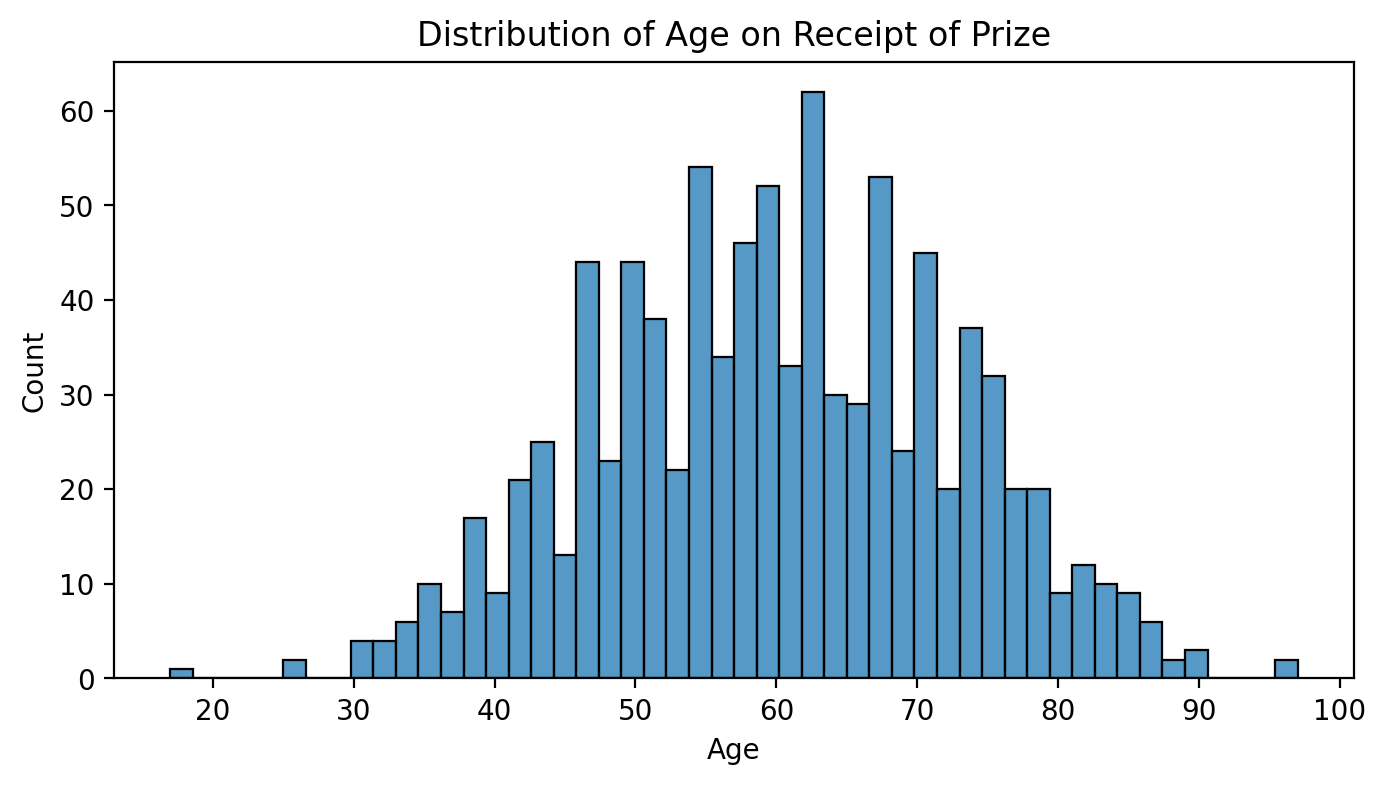

In [53]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=data,
             x=data.winning_age,
             bins=50)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Tasks**

* Use Seaborn to create a regplot with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


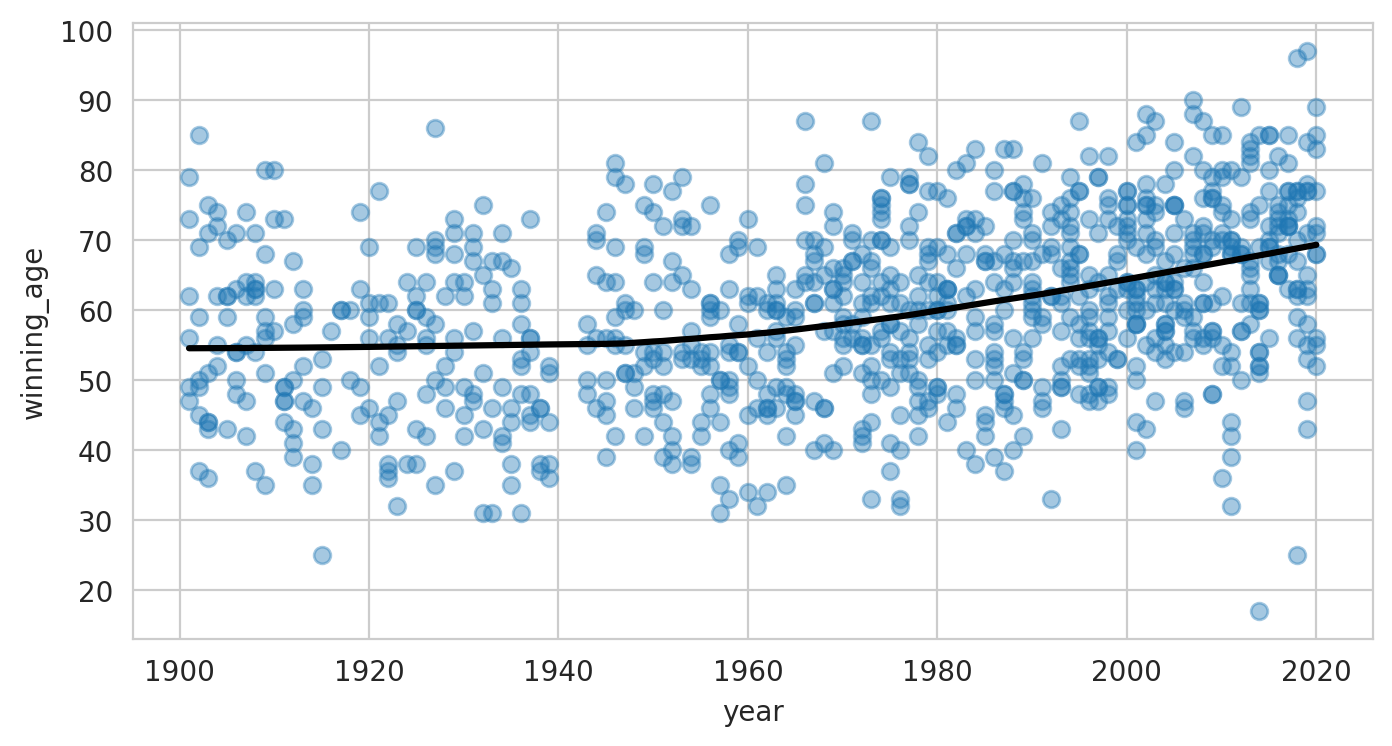

In [54]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=data,
                x='year',
                y='winning_age',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()